In [141]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc

# Exploration et prétraitement des données

In [142]:
# Chargement des données depuis Kaggle
# Assurez-vous d'avoir le fichier CSV téléchargé à l'adresse suivante dataset_url = "https://www.kaggle.com/datasets/himelsarder/road-accident-survival-dataset"
df = pd.read_csv(r"C:\Users\emman\Downloads\Module 3\accident.csv")

# Aperçu des données
display(df.head())

,Age,Gender,Speed_of_Impact,Helmet_Used,Seatbelt_Used,Survived
0,56,Female,27.0,No,No,1
1,69,Female,46.0,No,Yes,1
2,46,Male,46.0,Yes,Yes,0
3,32,Male,117.0,No,Yes,0
4,60,Female,40.0,Yes,Yes,0


L'objectif du prétraitement et l'exploration est de nettoyer et explorer les données, identifier les variables clefs et visualiser les relations entre les variables. C'est l'étape la plus longue et la plus importante dans tout algorithme. 

## Aperçu du dataset
Question 1 : Combien de lignes et de colonnes contient le dataset ? 



In [143]:

# 1 Nombre de lignes et de colonnes
nombre_lignes, nombre_colonnes = df.shape
print(f"Nombre de lignes: {nombre_lignes}")
print(f"Nombre de colonnes: {nombre_colonnes}")

Nombre de lignes: 200
Nombre de colonnes: 6


Question 2 : Quels sont les types de données des colonnes ?



In [144]:
# Informations générales sur le DataFrame
df.info()

# Afficher les types de données des colonnes
print(df.dtypes)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Age              200 non-null    int64  
 1   Gender           199 non-null    object 
 2   Speed_of_Impact  197 non-null    float64
 3   Helmet_Used      200 non-null    object 
 4   Seatbelt_Used    200 non-null    object 
 5   Survived         200 non-null    int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 9.5+ KB
Age                  int64
Gender              object
Speed_of_Impact    float64
Helmet_Used         object
Seatbelt_Used       object
Survived             int64
dtype: object


Réponse 2 : Le DataFrame comporte :
- 2 colonnes de type `int64` (Age, Survived),
- 1 colonne de type `float64` (Speed_of_Impact),
- 3 colonnes de type `object` (Gender, Helmet_Used, Seatbelt_Used).

Question 3 : Y a t-il des valeurs manquantes ? 



In [145]:
# 3 Vérifier les valeurs manquantes par colonne
print(df.isnull().sum())


Age                0
Gender             1
Speed_of_Impact    3
Helmet_Used        0
Seatbelt_Used      0
Survived           0
dtype: int64


Réponse 3 : Sur les 6 colonnes du DataFrame :
- La majorité des colonnes (Age, Helmet_Used, Seatbelt_Used, Survived) ne présentent aucune valeur manquante.
- La colonne **Gender** a une seule valeur manquante.
- La colonne **Speed_of_Impact** est la plus affectée, avec 3 valeurs manquantes.

## Statistiques descriptives des variables numériques
Question 4 : quelles sont les statistiques générales des variables numériques ?



In [146]:
# 4 Afficher les statistiques descriptives
display(df.describe())

,Age,Speed_of_Impact,Survived
count,200.00000,197.000000,200.00000
mean,43.42500,70.441624,0.50500
std,14.94191,30.125298,0.50123
min,18.00000,20.000000,0.00000
25%,31.00000,43.000000,0.00000
50%,43.50000,71.000000,1.00000
75%,56.00000,95.000000,1.00000
max,69.00000,119.000000,1.00000


Question 5 : combien de personnes ont survécues à l'accident ?



In [147]:
# 5 Calcul du nombre de survivants
survivors = df['Survived'].sum()
print("\nDétails des survivants :\n", df[df['Survived'] == 1])
print(f"Nombre de personnes ayant survécu : {survivors}")

# Distribution des survivants
print("\nDistribution des survivants :")
print(df['Survived'].value_counts())



Détails des survivants :
      Age  Gender  Speed_of_Impact Helmet_Used Seatbelt_Used  Survived
0     56  Female             27.0          No            No         1
1     69  Female             46.0          No           Yes         1
5     25    Male             49.0         Yes           Yes         1
6     38    Male            116.0         Yes           Yes         1
7     56    Male             47.0         Yes           Yes         1
..   ...     ...              ...         ...           ...       ...
195   69  Female            111.0          No           Yes         1
196   30  Female             51.0          No           Yes         1
197   58    Male            110.0          No           Yes         1
198   20    Male            103.0          No           Yes         1
199   56  Female             43.0          No           Yes         1

[101 rows x 6 columns]
Nombre de personnes ayant survécu : 101

Distribution des survivants :
Survived
1    101
0     99
Name: count

## Analyses des variables
Question 6 : tracez les histogrammes de chaque variable d'intérêt (sns.histplot / sns.countplot)



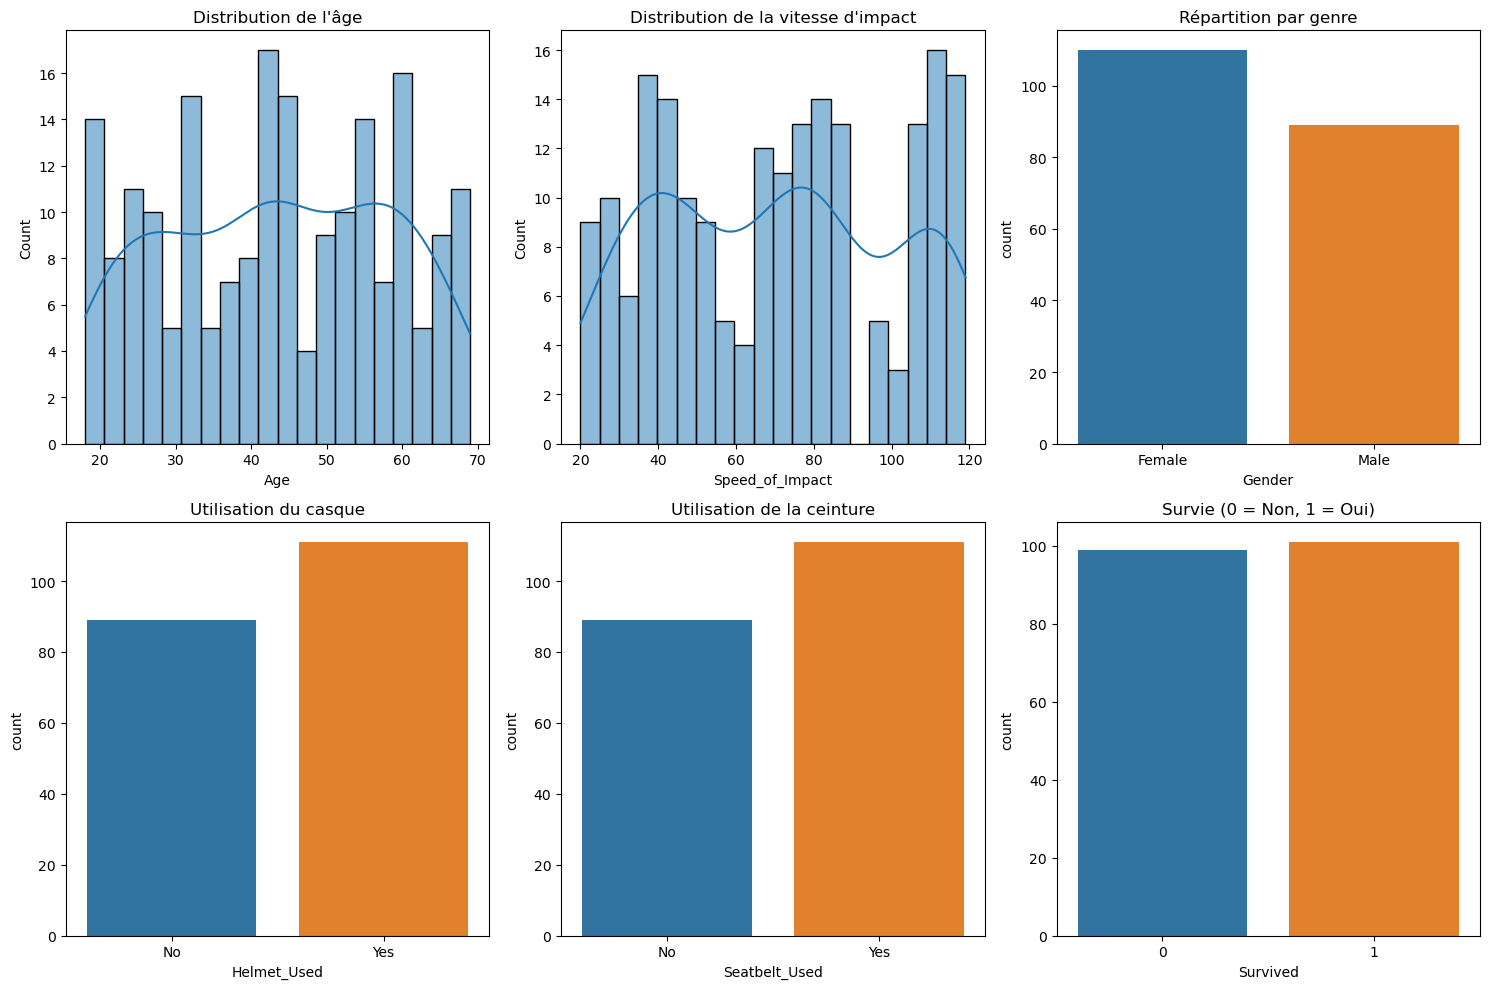

In [148]:
# 6 Histogrammes de chaque variable d'intérêt

# Configurer la taille des figures
plt.figure(figsize=(15, 10))

# Histogramme pour Age (variable numérique)
plt.subplot(2, 3, 1)
sns.histplot(df['Age'], bins=20, kde=True)
plt.title('Distribution de l\'âge')

# Histogramme pour Speed_of_Impact (variable numérique)
plt.subplot(2, 3, 2)
sns.histplot(df['Speed_of_Impact'], bins=20, kde=True)
plt.title('Distribution de la vitesse d\'impact')

# Countplot pour Gender (variable catégorique)
plt.subplot(2, 3, 3)
sns.countplot(x='Gender', data=df)
plt.title('Répartition par genre')

# Countplot pour Helmet_Used (variable catégorique)
plt.subplot(2, 3, 4)
sns.countplot(x='Helmet_Used', data=df)
plt.title('Utilisation du casque')

# Countplot pour Seatbelt_Used (variable catégorique)
plt.subplot(2, 3, 5)
sns.countplot(x='Seatbelt_Used', data=df)
plt.title('Utilisation de la ceinture')

# Countplot pour Survived (variable catégorique)
plt.subplot(2, 3, 6)
sns.countplot(x='Survived', data=df)
plt.title('Survie (0 = Non, 1 = Oui)')

# Ajuster l'espacement entre les graphiques
plt.tight_layout()

# Afficher les graphiques
plt.show()

Question 7 : étudiez au moyen de graphiques les corrélations à priori des variables unes à unes

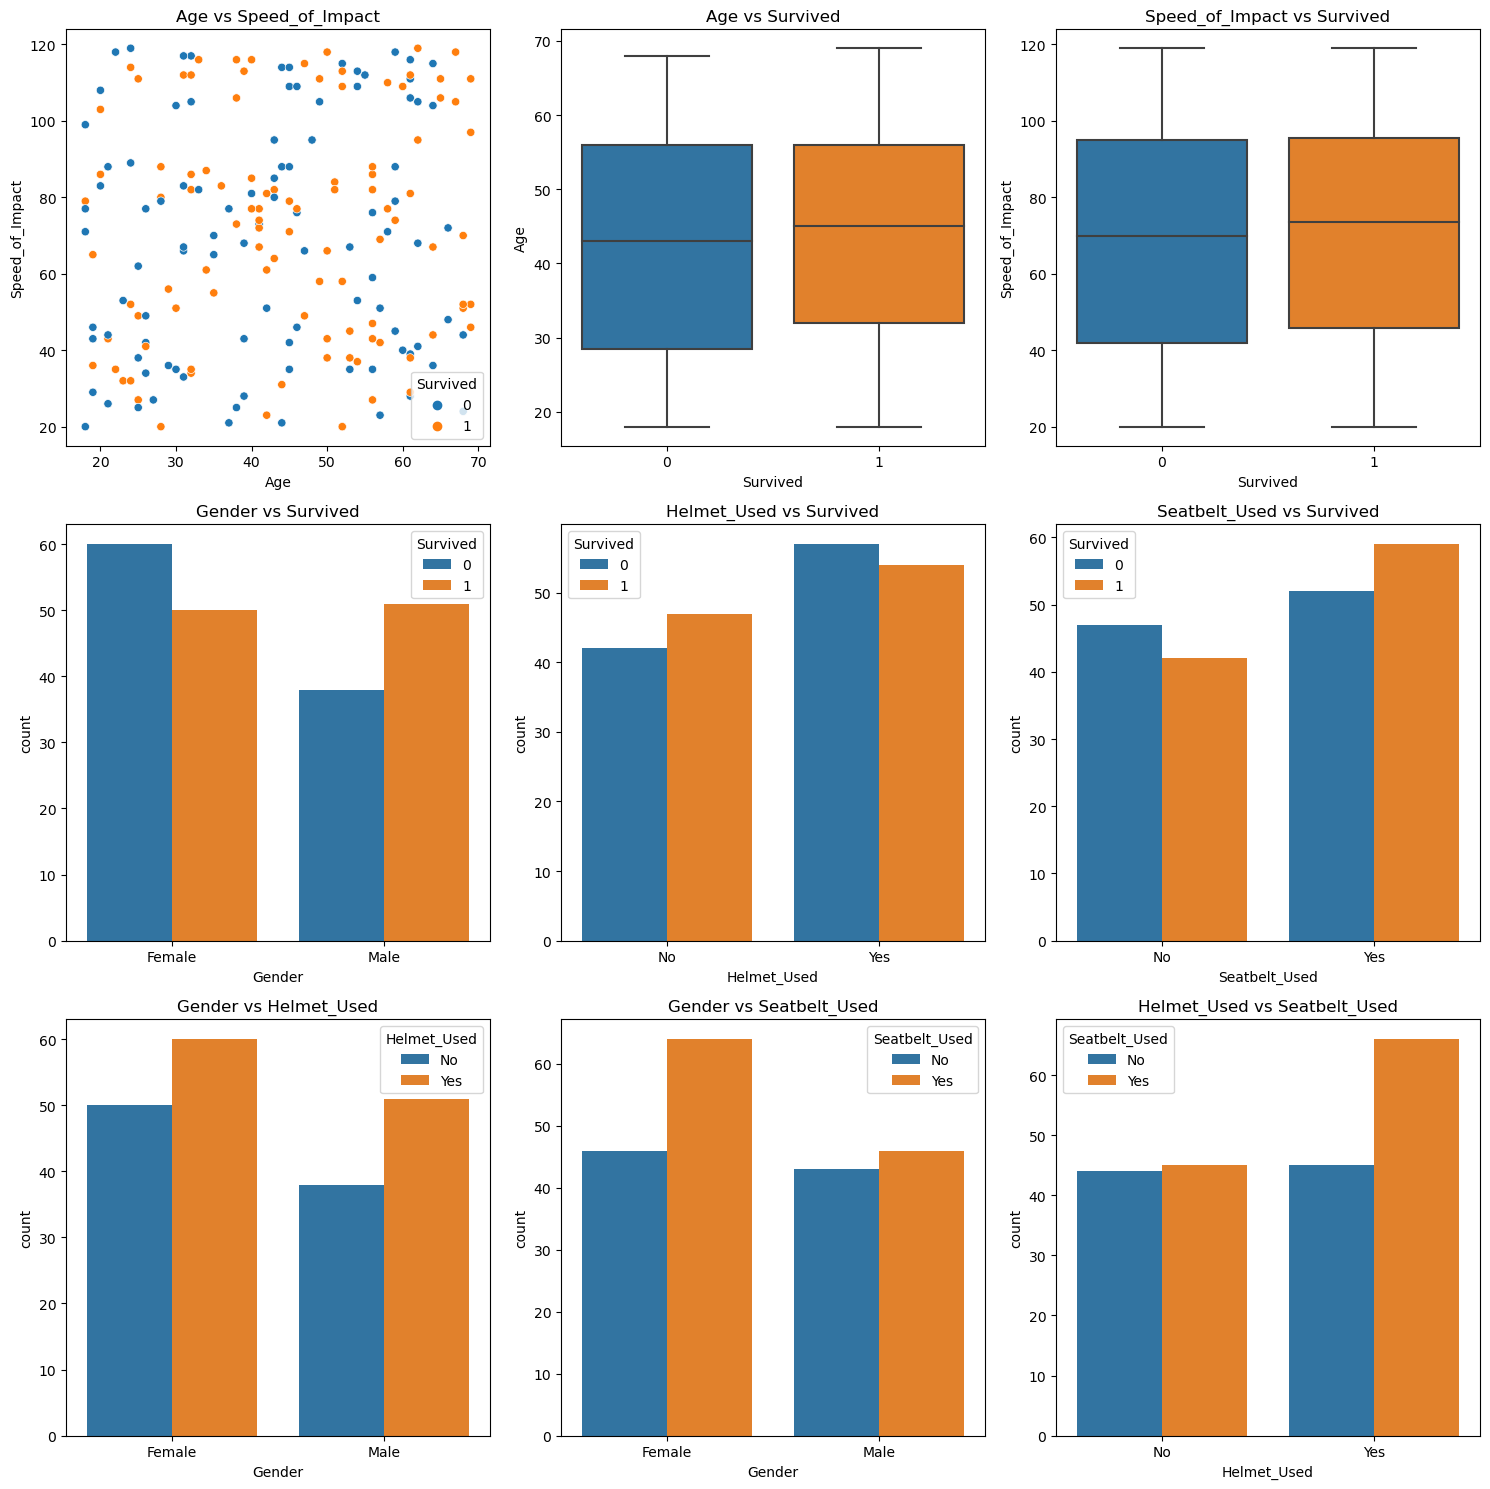

In [149]:
# Configurer la taille globale des figures
plt.figure(figsize=(15, 15))

# 1. Age vs Speed_of_Impact (numérique vs numérique)
plt.subplot(3, 3, 1)
sns.scatterplot(x='Age', y='Speed_of_Impact', hue='Survived', data=df)
plt.title('Age vs Speed_of_Impact')

# 2. Age vs Survived (numérique vs catégorique)
plt.subplot(3, 3, 2)
sns.boxplot(x='Survived', y='Age', data=df)
plt.title('Age vs Survived')

# 3. Speed_of_Impact vs Survived (numérique vs catégorique)
plt.subplot(3, 3, 3)
sns.boxplot(x='Survived', y='Speed_of_Impact', data=df)
plt.title('Speed_of_Impact vs Survived')

# 4. Gender vs Survived (catégorique vs catégorique)
plt.subplot(3, 3, 4)
sns.countplot(x='Gender', hue='Survived', data=df)
plt.title('Gender vs Survived')

# 5. Helmet_Used vs Survived (catégorique vs catégorique)
plt.subplot(3, 3, 5)
sns.countplot(x='Helmet_Used', hue='Survived', data=df)
plt.title('Helmet_Used vs Survived')

# 6. Seatbelt_Used vs Survived (catégorique vs catégorique)
plt.subplot(3, 3, 6)
sns.countplot(x='Seatbelt_Used', hue='Survived', data=df)
plt.title('Seatbelt_Used vs Survived')

# 7. Gender vs Helmet_Used (catégorique vs catégorique)
plt.subplot(3, 3, 7)
sns.countplot(x='Gender', hue='Helmet_Used', data=df)
plt.title('Gender vs Helmet_Used')

# 8. Gender vs Seatbelt_Used (catégorique vs catégorique)
plt.subplot(3, 3, 8)
sns.countplot(x='Gender', hue='Seatbelt_Used', data=df)
plt.title('Gender vs Seatbelt_Used')

# 9. Helmet_Used vs Seatbelt_Used (catégorique vs catégorique)
plt.subplot(3, 3, 9)
sns.countplot(x='Helmet_Used', hue='Seatbelt_Used', data=df)
plt.title('Helmet_Used vs Seatbelt_Used')

# Ajuster l'espacement entre les graphiques
plt.tight_layout()

# Afficher les graphiques
plt.show()

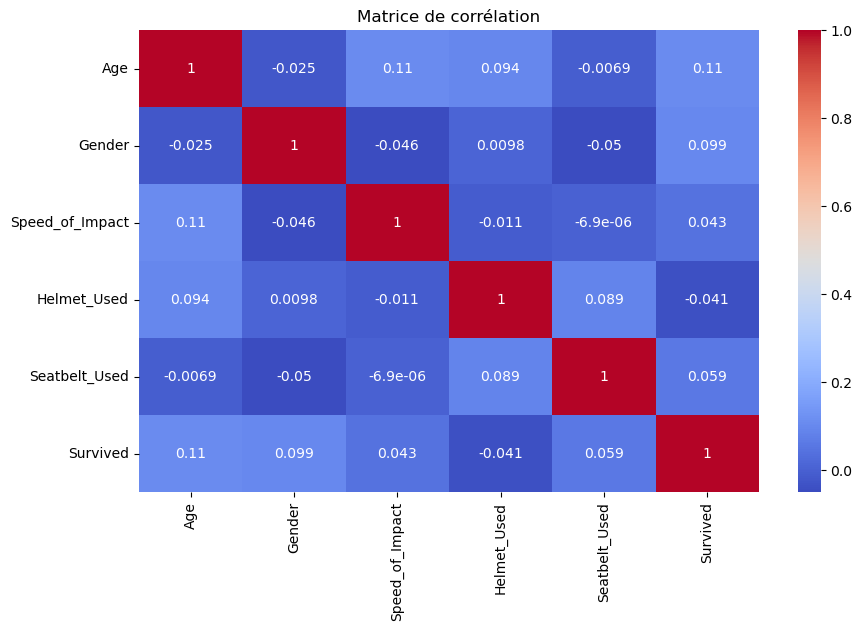

In [150]:
# Encodage des variables catégorielles
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])
df['Helmet_Used'] = le.fit_transform(df['Helmet_Used'])
df['Seatbelt_Used'] = le.fit_transform(df['Seatbelt_Used'])

# Matrice de corrélation
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Matrice de corrélation')
plt.show()


## Examen des corrélations

Peu de relations significatives entre les variables.
- Âge : faible corrélation positive avec vitesse d’impact, casque et survie.
- Sexe : peu d’impact sur équipements ou survie.
- Vitesse d’impact : effet marginal sur les autres variables.
- Casque et ceinture : légère tendance à être portés ensemble, mais impact sur survie limité.

Conclusion : d’autres facteurs pourraient mieux expliquer la survie.

# Préparation du dataset

In [151]:
# Supprimez les valeurs manquantes (essentielle pour la régression logistique)
df.dropna(inplace=True)

# Encodage des variables catégorielles
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])
df['Helmet_Used'] = le.fit_transform(df['Helmet_Used'])
df['Seatbelt_Used'] = le.fit_transform(df['Seatbelt_Used'])

# Préparez vos jeux d'entraînement et de test X_train, X_test et y_train et y_test
X = df[['Age', 'Gender', 'Speed_of_Impact', 'Helmet_Used', 'Seatbelt_Used']]  # Variables explicatives
y = df['Survived']  # Variable cible
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardisation
temp_cols = ['Age', 'Speed_of_Impact']
scaler = StandardScaler()
X_train[temp_cols] = scaler.fit_transform(X_train[temp_cols])
X_test[temp_cols] = scaler.transform(X_test[temp_cols])

# Entrainement et évaluation des trois modèles

In [152]:
# Entraînement des modèles

# Entraînement et évaluation de la Régression Logistique
log_model = LogisticRegression()
log_model.fit(X_train, y_train)  # Entraînement du modèle
y_pred_log = log_model.predict(X_test)  # Prédictions sur le jeu de test

print('\nModel: Logistic Regression')
print('Matrice de confusion :')
print(confusion_matrix(y_test, y_pred_log))
print('Rapport de classification :')
print(classification_report(y_test, y_pred_log))




Model: Logistic Regression
Matrice de confusion :
[[14 21]
 [ 6 19]]
Rapport de classification :
              precision    recall  f1-score   support

           0       0.70      0.40      0.51        35
           1       0.47      0.76      0.58        25

    accuracy                           0.55        60
   macro avg       0.59      0.58      0.55        60
weighted avg       0.61      0.55      0.54        60



## Régression Logistique
- Précision globale : 55 %, la meilleure des trois.
- Classe 1 (positifs) : rappel de 76 %, détecte bien les survivants.
- Classe 0 (négatifs) : précision de 70 %, mais rappel faible (40 %).
- Score F1 : le plus élevé, bon compromis précision/rappel.

In [153]:
# Entraînement et évaluation de l'Arbre de Décision
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)  # Entraînement du modèle
y_pred_tree = tree_model.predict(X_test)  # Prédictions sur le jeu de test

print('\nModel: Decision Tree')
print('Matrice de confusion :')
print(confusion_matrix(y_test, y_pred_tree))
print('Rapport de classification :')
print(classification_report(y_test, y_pred_tree))



Model: Decision Tree
Matrice de confusion :
[[16 19]
 [ 9 16]]
Rapport de classification :
              precision    recall  f1-score   support

           0       0.64      0.46      0.53        35
           1       0.46      0.64      0.53        25

    accuracy                           0.53        60
   macro avg       0.55      0.55      0.53        60
weighted avg       0.56      0.53      0.53        60



## Arbre de Décision

- Précision : 48 %, moins performante.
- Équilibre entre classes : rappel de 46 % (classe 0) et 52 % (classe 1).
- Score F1 : inférieur à la régression logistique, moins fiable.

In [154]:

# Entraînement et évaluation de la Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)  # Entraînement du modèle
y_pred_rf = rf_model.predict(X_test)  # Prédictions sur le jeu de test

print('\nModel: Random Forest')
print('Matrice de confusion :')
print(confusion_matrix(y_test, y_pred_rf))
print('Rapport de classification :')
print(classification_report(y_test, y_pred_rf))


Model: Random Forest
Matrice de confusion :
[[15 20]
 [11 14]]
Rapport de classification :
              precision    recall  f1-score   support

           0       0.58      0.43      0.49        35
           1       0.41      0.56      0.47        25

    accuracy                           0.48        60
   macro avg       0.49      0.49      0.48        60
weighted avg       0.51      0.48      0.48        60



## Random Forest

- Précision : 42 %, la plus faible.
- Classe 0 : rappel de 34 %, faible détection.
- Classe 1 : rappel de 52 %, mais précision basse (36 %).
- Score F1 : le plus bas, généralisation médiocre.

## Comparaison et Conclusion

- Régression logistique : meilleure performance globale.
- Arbre de décision : deuxième, mais manque de fiabilité.
- Forêt aléatoire : la moins efficace.

Il convient donc d'ajuster les modèles ou d'en tester d'autres.